**Analyzing ACL Tear Data to Discover Demographic, Injury, Diagnosis, and Information Trends**

Marisa Ricci and Matthew Scherp

Hyperlink to github webpage:

**Project Description**

Our project is an analysis of data relating to ACL tears. Both of us play soccer and ACL tears are incredibly common so we wanted to do an analyis to find correlations between different variables and ACL tears as well as interesting post ACL tear data. We found data sets that provided us data on people who have torn ACLs including tear mechanisms, diagnosistic tools used (and their conclusions), and demographic information. We also found information on how people are informed and beliefs they hold about them.

Links to data:

**Collaboration Plan**

We are in every class together and also work the same on campus job. We plan to work together in the Makerspace when the other person is on shift because that automatically provides 6 hours per week. We also each have copies of the Colab notebooks and can commit the changes to the master which reduces the possibilityof changes getting overwritten if we are working at the same time. We also have each picked a data set to be the "expert" in and as we had more data sets we will likely continue to specialize. However, we are checking in with each other and giving the other person suggestions for other interesting elements to work on in their data.

**Project Goals**

By the end of this project we want to have found several statistical relationships in our ACL data in the following categories: diagnosis, demographics, injury mechanism, and level of information. While we can't draw any causation related conclusions from statistical correlations, we can see potential avenues for further research.

**Potential Questions to Explore**

1) How accurate are physicians in diagnosing ACL tears from their own physical exmainations, MRIs, and other relevant tests?

2) Do demographics such as age and gender play a role in likelihood of an ACL tear?

3) How do people commonly hear about ACL tears? Is there a lot of misinformation surrounding ACL tears?

4) What are common causes of ACL tears and what motions are correlated to ACL tears?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as str
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/'Colab Notebooks'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [4]:
# import data
ACL2 = pd.read_excel('../Project/RawACLData.xlsx')
# drop columns with no data
ACL2 = ACL2.drop(columns=['Unnamed: 0', 'Unnamed: 1','Column1', 'Column2',
                          'Column3', 'Column4', 'Column5', 'Column6', 'Number'])
# drop all rows past 133 (last row with usable data)
ACL2 = ACL2.reset_index(drop=True)
ACL2 = ACL2.iloc[:88]
ACL2

,Age,sex,injured knee (R or L),"Lachman injured (pos=1, neg=0)",Anterior Drawer injured,Lever injured,Diagnosis by Physician (Y=1 or N=0),Lachman unaffected,Anterior Drawer Unaffected,Lever unaffected,...,ACL Arthroscopy (1 = torn ACL or 0 = intact ACL),ACL Lat Meniscus,ACL Medial,Intraop findings,Scope Lat Men,Scope Med Men,Pivot Shift intraop injured,Previous Knee Surgery,mechanism of injury,Date of Operation for Current Injury
0,29.0,F,L,0.0,0.0,1,0.0,0.0,0.0,1.0,...,1.0,NaN,NaN,(+) empty wall sign,0.0,NaN,Y,No,Fall,2019-04-26
1,30.0,M,R,1.0,0.0,1,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,ACL and LATERAL mensicus,1.0,NaN,1,NaN,Soccer,NaT
2,18.0,M,L,1.0,0.0,0,1.0,0.0,0.0,0.0,...,1.0,NaN,NaN,ACL and medial meniscus tear,0.0,1.0,NaN,NaN,Tackled with planted foot,2018-04-04
3,31.0,M,R,1.0,0.0,0,1.0,0.0,0.0,0.0,...,1.0,NaN,NaN,ACL and MEDIAL MENISCUS TEAR,0.0,1.0,NaN,No,valgus force (basketball),2018-11-29
4,28.0,F,R,0.0,0.0,0,0.0,0.0,0.0,0.0,...,1.0,NaN,NaN,ACL tear + lateral meniscus tear,1.0,NaN,1,Left ACL reconstruction,Planting (Soccer),2018-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,41.0,F,L,0.0,0.0,1,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,MEDIAL meniscus tear and chondromalacia,NaN,NaN,NaN,NaN,Fall,2018-07-25
84,33.0,M,L,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,Medial Plica,NaN,NaN,NaN,NaN,Running,2018-04-30
85,20.0,F,L,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,Medial Plica,NaN,NaN,NaN,NaN,No Inciting Event,2018-05-16
86,18.0,M,L,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,Plica and loose body,NaN,NaN,NaN,NaN,Collision with another person,2017-12-22


In [5]:
# demographic dataframe
demo_ACL2_df = ACL2[['Age', 'sex', 'injured knee (R or L)', 'ACL Arthroscopy (1 = torn ACL or 0 = intact ACL)']]
demo_ACL2_df
# We can find most similar people/injuries from this

,Age,sex,injured knee (R or L),ACL Arthroscopy (1 = torn ACL or 0 = intact ACL)
0,29.0,F,L,1.0
1,30.0,M,R,1.0
2,18.0,M,L,1.0
3,31.0,M,R,1.0
4,28.0,F,R,1.0
...,...,...,...,...
83,41.0,F,L,0.0
84,33.0,M,L,0.0
85,20.0,F,L,0.0
86,18.0,M,L,0.0


In [6]:
# count females with potentially torn ACLs
female_acl_count = demo_ACL2_df[demo_ACL2_df["sex"] == 'F'].shape[0]

# count males with potentially torn ACLs
male_acl_count = demo_ACL2_df[demo_ACL2_df["sex"] == 'M'].shape[0]

# print in a pretty way
print(f"Females with torn ACLs: {female_acl_count}")
print(f"Males with torn ACLs: {male_acl_count}")

Females with torn ACLs: 39
Males with torn ACLs: 49


<ipython-input-12-4f61214f4378>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  causes_df['category'] = causes_df['mechanism of injury']


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'No Inciting Event'),
  Text(1, 0, 'Basketball'),
  Text(2, 0, 'Soccer'),
  Text(3, 0, 'Fall'),
  Text(4, 0, 'Football'),
  Text(5, 0, 'Hyperextension'),
  Text(6, 0, 'Standing'),
  Text(7, 0, 'Twisting'),
  Text(8, 0, 'Running'),
  Text(9, 0, 'Landing'),
  Text(10, 0, 'Volleyball'),
  Text(11, 0, 'Baseball/Softball'),
  Text(12, 0, 'Vehicle Accident'),
  Text(13, 0, 'Tackled/Collision'),
  Text(14, 0, 'Ultimate Frisbee'),
  Text(15, 0, 'Pivoting'),
  Text(16, 0, 'Dancing'),
  Text(17, 0, 'Crossfit'),
  Text(18, 0, 'Extension from deep flexion'),
  Text(19, 0, 'Trampoline'),
  Text(20, 0, 'Stepped into divot'),
  Text(21, 0, 'MMA training'),
  Text(22, 0, 'Wrestling'),
  Text(23, 0, 'Hiking'),
  Text(24, 0, 'Lower Body Exercises'),
  Text(25, 0, 'Planting')])

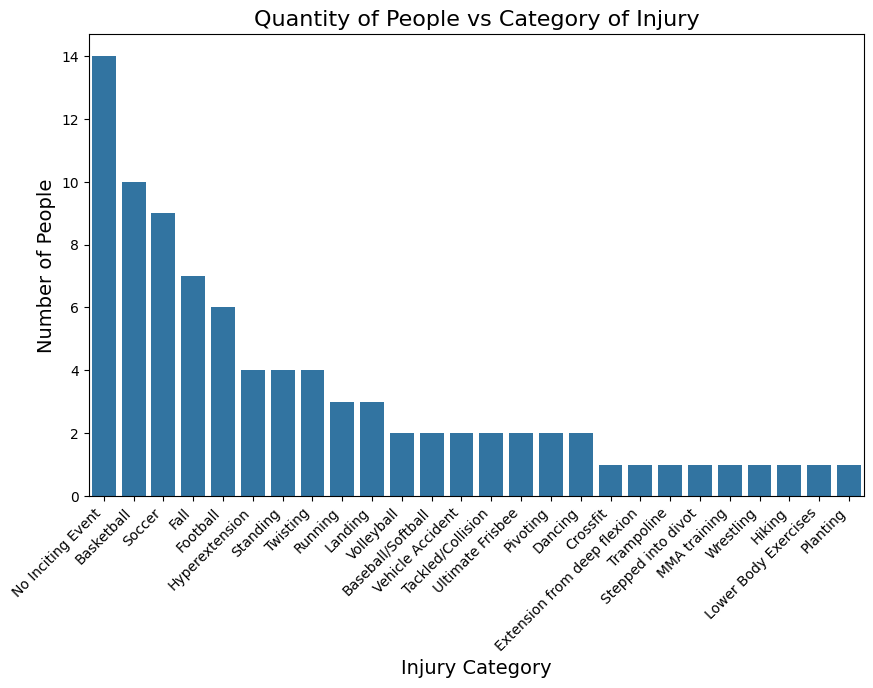

In [12]:
# causes of potential ACL tear
causes_df = ACL2[["mechanism of injury"]]

# new column category based on mechanism of injury
causes_df['category'] = causes_df['mechanism of injury']

# assign category to rows where the mechanism of injury contains the specific row
# nothing assigned twice and specific events (e.g. soccer, vehicle accident)
# are preferenced over general motions (e.g. twisting, standing)

# general categories
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Tackled', case=False, na=False), 'category'] = 'Tackled/Collision'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Collision', case=False, na=False), 'category'] = 'Tackled/Collision'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'twisting', case=False, na=False), 'category'] = 'Twisting'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Fall', case=False, na=False), 'category'] = 'Fall'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'pivot', case=False, na=False), 'category'] = 'Pivoting'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Landing', case=False, na=False), 'category'] = 'Landing'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Standing', case=False, na=False), 'category'] = 'Standing'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Hyperextension', case=False, na=False), 'category'] = 'Hyperextension'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Hypextension', case=False, na=False), 'category'] = 'Hyperextension'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Hyperextended', case=False, na=False), 'category'] = 'Hyperextension'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'No inciting event', case=False, na=False), 'category'] = 'No Inciting Event'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Nothing specific', case=False, na=False), 'category'] = 'No Inciting Event'

# more specific categories (will overwrite general categories if specificity found)
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Soccer', case=False, na=False), 'category'] = 'Soccer'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Football', case=False, na=False), 'category'] = 'Football'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Footabll', case=False, na=False), 'category'] = 'Football'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Basketball', case=False, na=False), 'category'] = 'Basketball'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Volleyball', case=False, na=False), 'category'] = 'Volleyball'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Crossfit', case=False, na=False), 'category'] = 'Crossfit'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Dancing', case=False, na=False), 'category'] = 'Dancing'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Ultimate Frisbee', case=False, na=False), 'category'] = 'Ultimate Frisbee'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'MVA', case=False, na=False), 'category'] = 'Vehicle Accident'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Motorcycle Accident', case=False, na=False), 'category'] = 'Vehicle Accident'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Baseball', case=False, na=False), 'category'] = 'Baseball/Softball'
causes_df.loc[causes_df['mechanism of injury'].str.contains(
    'Softball', case=False, na=False), 'category'] = 'Baseball/Softball'

# count occurrences of each category
category_counts = causes_df['category'].value_counts()

# plot counts
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)

# plot details
plt.title('Quantity of People vs Category of Injury', fontsize=16)
plt.xlabel('Injury Category', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=45, ha='right')

In [7]:
# accuracy of diagnosis
diagnosis_df = ACL2[["Lachman injured (pos=1, neg=0)",
                     "Diagnosis by Physician (Y=1 or N=0)",
                     "ACL MRI (1 = torn ACL or 0 = ACL intact)",
                     "ACL Arthroscopy (1 = torn ACL or 0 = intact ACL)"]]
# These are all the different ways the study attemped to diagnose an ACL tear
# with ACL anthroscopy being the last (actually surgical where you look and see
# if the ACL is torn). We can use this dataframe to compare the accuracy of
# Lachman tests, physician diagnoses, and ACL MRIs.

diagnosis_df

,"Lachman injured (pos=1, neg=0)",Diagnosis by Physician (Y=1 or N=0),ACL MRI (1 = torn ACL or 0 = ACL intact),ACL Arthroscopy (1 = torn ACL or 0 = intact ACL)
0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
83,0.0,0.0,0.0,0.0
84,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0


     UserID  ACL  Self Injury  Injured Family/Friend  Friends  Family  Coach  \
1         1    1            0                      0        0       0      0   
2         2    1            0                      0        0       0      0   
3         3    1            0                      0        0       0      0   
4         4    1            0                      0        0       0      0   
5         5    1            0                      0        0       0      0   
..      ...  ...          ...                    ...      ...     ...    ...   
896     896    1            0                      0        1       0      0   
897     897    1            0                      0        1       0      0   
898     898    1            0                      0        0       0      0   
899     899    1            0                      0        0       0      0   
900     900    1            0                      0        1       0      1   

     Health Class  Other Class  TV  Mag

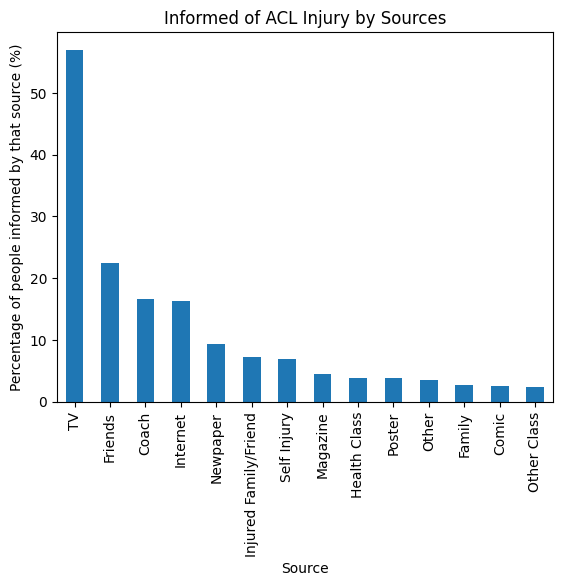

In [8]:
ACL3 = pd.read_csv("../Project/raw_data.csv",encoding = "latin-1")
#Removing first row, and renaming all of the columns into names that are
#recognizable and short for ease of calling
ACL3 = ACL3[1:].astype(int)
ACL3.columns = ["UserID", "ACL", "Self Injury", "Injured Family/Friend","Friends","Family",
                "Coach","Health Class", "Other Class","TV", "Magazine",
                "Comic","Internet", "Newpaper","Poster","Other","Bone Geometry",
                "ACL Size","Joint Laxity","Hormone","Flexibility","Foot Pronation",
                "Weak Quadricep Muscle", "Weak Hamstring Muscle","Weak Hip Muscle","Balance",
                "Weight","Drinking","Smoking","Genu Valgum","Genu Varum",
                "Sex","Age"]
ACL3["Sex"] = ACL3["Sex"].map({
    0:"M",
    1:"F"
})
#Taking all of the values from the first question and better formating it
ACL3_Discover = ACL3[["UserID", "ACL", "Self Injury", "Injured Family/Friend",
                      "Friends","Family","Coach","Health Class", "Other Class",
                      "TV", "Magazine", "Comic","Internet", "Newpaper","Poster",
                      "Other","Sex","Age"]].copy()
print(ACL3_Discover)
discover_ave = ACL3_Discover[["Self Injury", "Injured Family/Friend","Friends","Family",
                 "Coach","Health Class", "Other Class","TV", "Magazine", "Comic",
                 "Internet", "Newpaper","Poster",
                              "Other"]].sum()/len(ACL3_Discover) * 100
discover_ave = discover_ave.sort_values(ascending = False)
ax = discover_ave.plot.bar()
ax = plt.title("Informed of ACL Injury by Sources")
ax = plt.ylabel("Percentage of people informed by that source (%)")
ax = plt.xlabel("Source")
print("NOTE: % does not equal to 100% as some people have been informed by " +
      "multiple sources")

   UserID  Bone Geometry  ACL Size  Joint Laxity  Hormone  Flexibility  \
1       1              1         1             1        0            1   
2       0              1         1             1        0            1   
3       3              0         1             1        0            1   
4       4              1         1             0        0            1   
5       5              1         1             0        0            1   

   Foot Pronation  Weak Quadricep Muscle  Weak Hamstring Muscle  \
1               0                      1                      0   
2               0                      1                      1   
3               0                      1                      1   
4               1                      1                      1   
5               1                      1                      1   

   Weak Hip Muscle  Balance  Weight  Drinking  Smoking  Genu Valgum  \
1                0        1       1         0        0            0   
2         

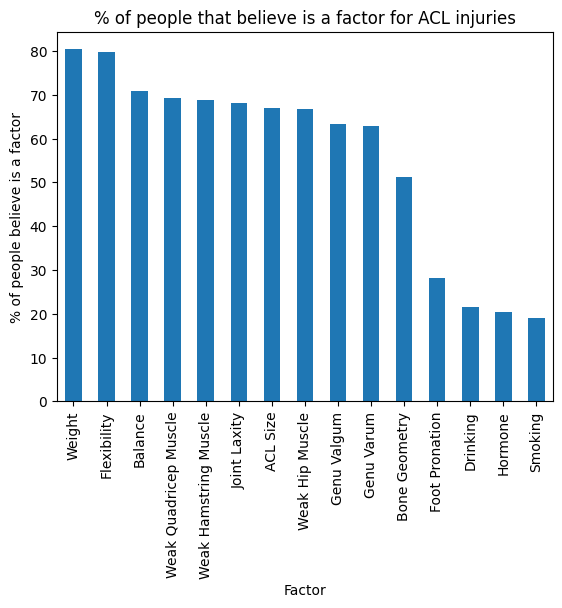

In [9]:
#Taking all of the values from the second question and better formating it
ACL3_Fac = ACL3[["UserID","Bone Geometry","ACL Size","Joint Laxity",
                    "Hormone","Flexibility","Foot Pronation","Weak Quadricep Muscle",
                    "Weak Hamstring Muscle","Weak Hip Muscle","Balance","Weight",
                    "Drinking","Smoking","Genu Valgum","Genu Varum","Sex","Age"]]
ACL3_Fac =ACL3_Fac.replace(1,1)
ACL3_Fac =ACL3_Fac.replace(2,0)
print(ACL3_Fac.head(5))
factor_ave = ACL3_Fac[["Bone Geometry","ACL Size","Joint Laxity",
                    "Hormone","Flexibility","Foot Pronation","Weak Quadricep Muscle",
                    "Weak Hamstring Muscle","Weak Hip Muscle","Balance","Weight",
                    "Drinking","Smoking","Genu Valgum","Genu Varum"]].sum()/len(ACL3_Fac) *100
factor_ave = factor_ave.sort_values(ascending = False)
ax = factor_ave.plot.bar()
ax = plt.title("% of people that believe is a factor for ACL injuries")
ax = plt.ylabel("% of people believe is a factor")
ax = plt.xlabel("Factor")
